In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# using linear regression

In [2]:


data = pd.read_csv("diabetes.csv")


print(data.head())
print(data.shape)
print(data.columns)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.drop(columns=['Pregnancies'], inplace=True)

[0 1 2 3 4 5 6]


([<matplotlib.axis.XTick at 0x1d603a6ded0>,
 [Text(0, 0, 'Glucose'),
  Text(1, 0, 'BloodPressure'),
  Text(2, 0, 'SkinThickness'),
  Text(3, 0, 'Insulin'),
  Text(4, 0, 'BMI'),
  Text(5, 0, 'DiabetesPedigreeFunction'),
  Text(6, 0, 'Age')])

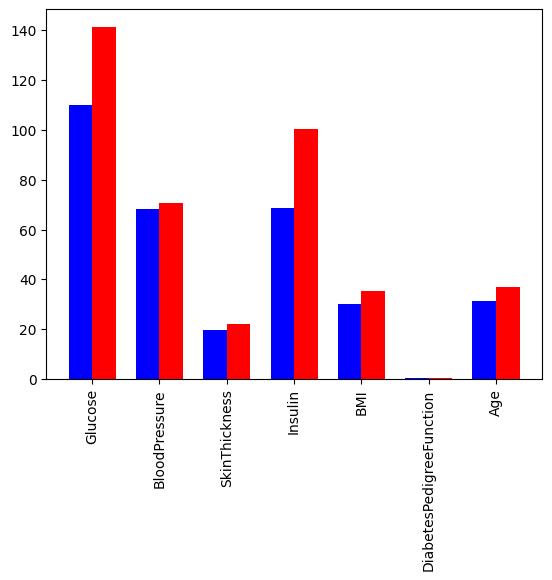

In [6]:
x = np.arange(len(data.columns)-1)  # Indices for the columns
width = 0.35
print(x)
plt.bar(x-width/2, data[data["Outcome"]==0].mean()[:-1:], width, color = 'blue')
plt.bar(x+width/2, data[data["Outcome"]==1].mean()[:-1:], width, color = 'red')
plt.xticks(x, data.columns[:-1:], rotation=90)
#print(data[data["Outcome"]==0])

In [7]:
# Replace values in the 'Glucose' column where Glucose <= 1 and Outcome == 0
data.loc[(data['Glucose'] == 0) & (data['Outcome'] == 0), 'Glucose'] = data.loc[data['Outcome'] == 0, 'Glucose'].mean()
data.loc[(data['Glucose'] == 0) & (data['Outcome'] == 1), 'Glucose'] = data.loc[data['Outcome'] == 1, 'Glucose'].mean()

data.loc[(data['BloodPressure'] == 0) & (data['Outcome'] == 0), 'BloodPressure'] = data.loc[data['Outcome'] == 0, 'BloodPressure'].mean()
data.loc[(data['BloodPressure'] == 0) & (data['Outcome'] == 1), 'BloodPressure'] = data.loc[data['Outcome'] == 1, 'BloodPressure'].mean()

data.loc[(data['Insulin'] == 0) & (data['Outcome'] == 0), 'Insulin'] = data.loc[data['Outcome'] == 0, 'Insulin'].mean()
data.loc[(data['Insulin'] == 0) & (data['Outcome'] == 1), 'Insulin'] = data.loc[data['Outcome'] == 1, 'Insulin'].mean()

data.loc[(data['BMI'] == 0) & (data['Outcome'] == 0), 'BMI'] = data.loc[data['Outcome'] == 0, 'BMI'].mean()
data.loc[(data['BMI'] == 0) & (data['Outcome'] == 1), 'BMI'] = data.loc[data['Outcome'] == 1, 'BMI'].mean()


C:\Users\rrpra\AppData\Local\Temp\ipykernel_11252\1441462518.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '109.98' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data['Glucose'] == 0) & (data['Outcome'] == 0), 'Glucose'] = data.loc[data['Outcome'] == 0, 'Glucose'].mean()
C:\Users\rrpra\AppData\Local\Temp\ipykernel_11252\1441462518.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '68.184' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data['BloodPressure'] == 0) & (data['Outcome'] == 0), 'BloodPressure'] = data.loc[data['Outcome'] == 0, 'BloodPressure'].mean()
C:\Users\rrpra\AppData\Local\Temp\ipykernel_11252\1441462518.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an erro

In [8]:
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.691999,72.267826,20.536458,118.967780,32.439222,0.471876,33.240885,0.348958
std,30.461151,12.115948,15.952218,93.557899,6.880449,0.331329,11.760232,0.476951
min,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,99.750000,64.000000,0.000000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
normalize_data = pd.DataFrame()
for name in data.columns[:-1:]:

        min_val = data[name].min()  # Minimum value of the column
        max_val = data[name].max()  # Maximum value of the column
        normalize_data[f'{name}_normalized'] = (data[name] - min_val) / (max_val - min_val)

target = data["Outcome"]


In [10]:
normalize_data.sample(10)

,Glucose_normalized,BloodPressure_normalized,SkinThickness_normalized,Insulin_normalized,BMI_normalized,DiabetesPedigreeFunction_normalized,Age_normalized
309,0.516129,0.448980,0.282828,0.229567,0.300613,0.340307,0.150000
153,0.703226,0.591837,0.424242,0.566106,0.458078,0.260034,0.033333
567,0.309677,0.387755,0.323232,0.134615,0.282209,0.002989,0.416667
293,0.541935,0.244898,0.454545,0.216346,0.456033,0.228437,0.050000
440,0.935484,0.816327,0.252525,0.103769,0.329243,0.152434,0.333333
142,0.412903,0.285714,0.262626,0.058894,0.292434,0.102477,0.016667
188,0.419355,0.530612,0.393939,0.120192,0.198364,0.239966,0.166667
637,0.322581,0.530612,0.181818,0.062500,0.274029,0.243809,0.033333
420,0.483871,0.653061,0.414141,0.187500,0.554192,0.183177,0.083333
331,0.277419,0.346939,0.161616,0.045673,0.296524,0.037575,0.066667


In [11]:
normalize_data.describe()

,Glucose_normalized,BloodPressure_normalized,SkinThickness_normalized,Insulin_normalized,BMI_normalized,DiabetesPedigreeFunction_normalized,Age_normalized
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.501239,0.492529,0.207439,0.126163,0.291191,0.168179,0.204015
std,0.196524,0.123632,0.161134,0.112449,0.140704,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359677,0.408163,0.000000,0.065856,0.190184,0.070773,0.050000
50%,0.470968,0.489796,0.232323,0.103365,0.283231,0.125747,0.133333
75%,0.625806,0.571429,0.323232,0.136118,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(normalize_data, target, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.13787991486126167
R-squared: 0.4041617964924049


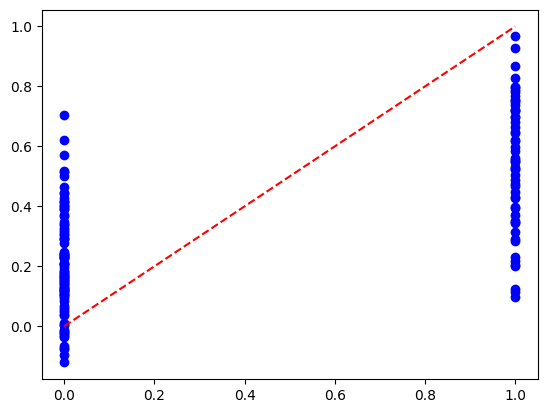

In [14]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.show()

In [15]:
for i in range(len(y_pred)):
    y_pred[i] = y_pred[i] > 0.45
    #print(y_pred[i],y_test.iloc[i])
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.]
Mean Squared Error: 0.16883116883116883
R-squared: 0.27040816326530603


In [16]:

tt=0
tf=0
ff=0
ft=0
n=len(y_test)
y_test = np.array(y_test)
for i in range(n):
    tt += y_test[i] and y_pred[i]
    tf += y_test[i] and not(y_pred[i])
    ff += not(y_test[i]) and not(y_pred[i])
    ft += not(y_test[i]) and y_pred[i]
print(tt,tf,ff,ft)

37.0 19 91 7.0


In [17]:
acuracy = (tt+ff)/n
print(acuracy)

0.8311688311688312


# Using SVM

In [18]:
data = pd.read_csv("diabetes.csv")

In [19]:
print(data.columns)
features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'Age']
targets = ['Outcome']


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [20]:
print(data[features].info())
print(data[targets].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Age            768 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 42.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB
None


In [21]:
print(data[features].describe())
print(data[targets].describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI         Age  
count  768.000000  768.000000  
mean    31.992578   33.240885  
std      7.884160   11.760232  
min      0.000000   21.000000  
25%     27.300000   24.000000  
50%     32.000000   29.000000  
75%     36.600000   41.000000  
max     67.100000   81.000000  
          Outcome
count  76

In [22]:
#oulier removing
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for name in features:
    q1 = data[name].quantile(0.25)
    q3 = data[name].quantile(0.75)
    iqr = q3-q1
    mi = q1-iqr*1.5
    ma = q3+iqr*1.5
    data.drop(index = data[(data[name]<mi) | (data[name]>ma)].index, inplace=True)


0 Pregnancies
1 Glucose
2 BloodPressure
3 SkinThickness
4 Insulin
5 BMI
6 DiabetesPedigreeFunction
7 Age


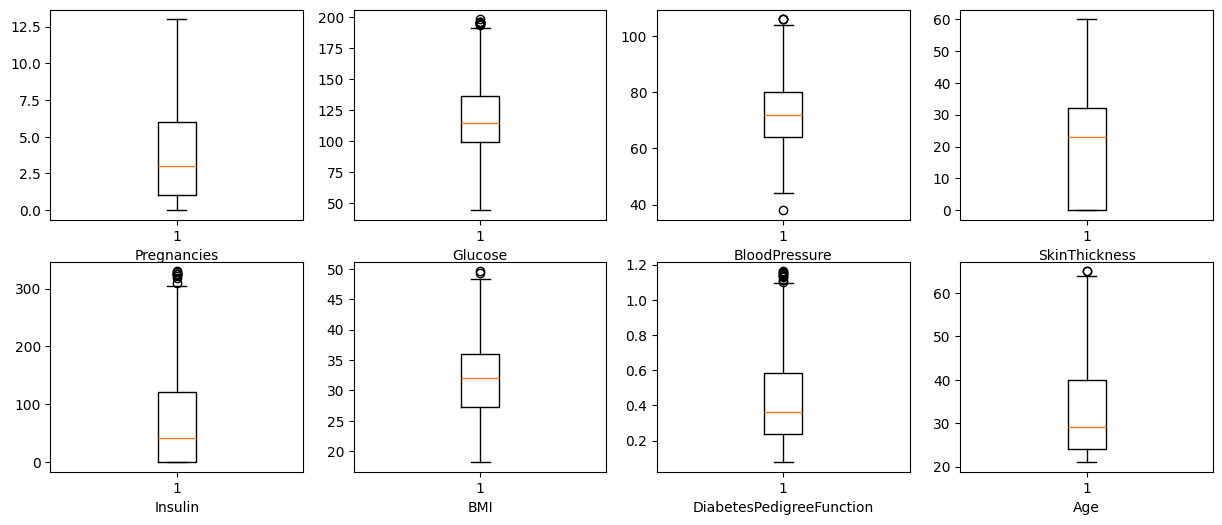

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i,name in enumerate(features):
    print(i,name)
    axes[i].boxplot(data[name])
    axes[i].set_xlabel(name)

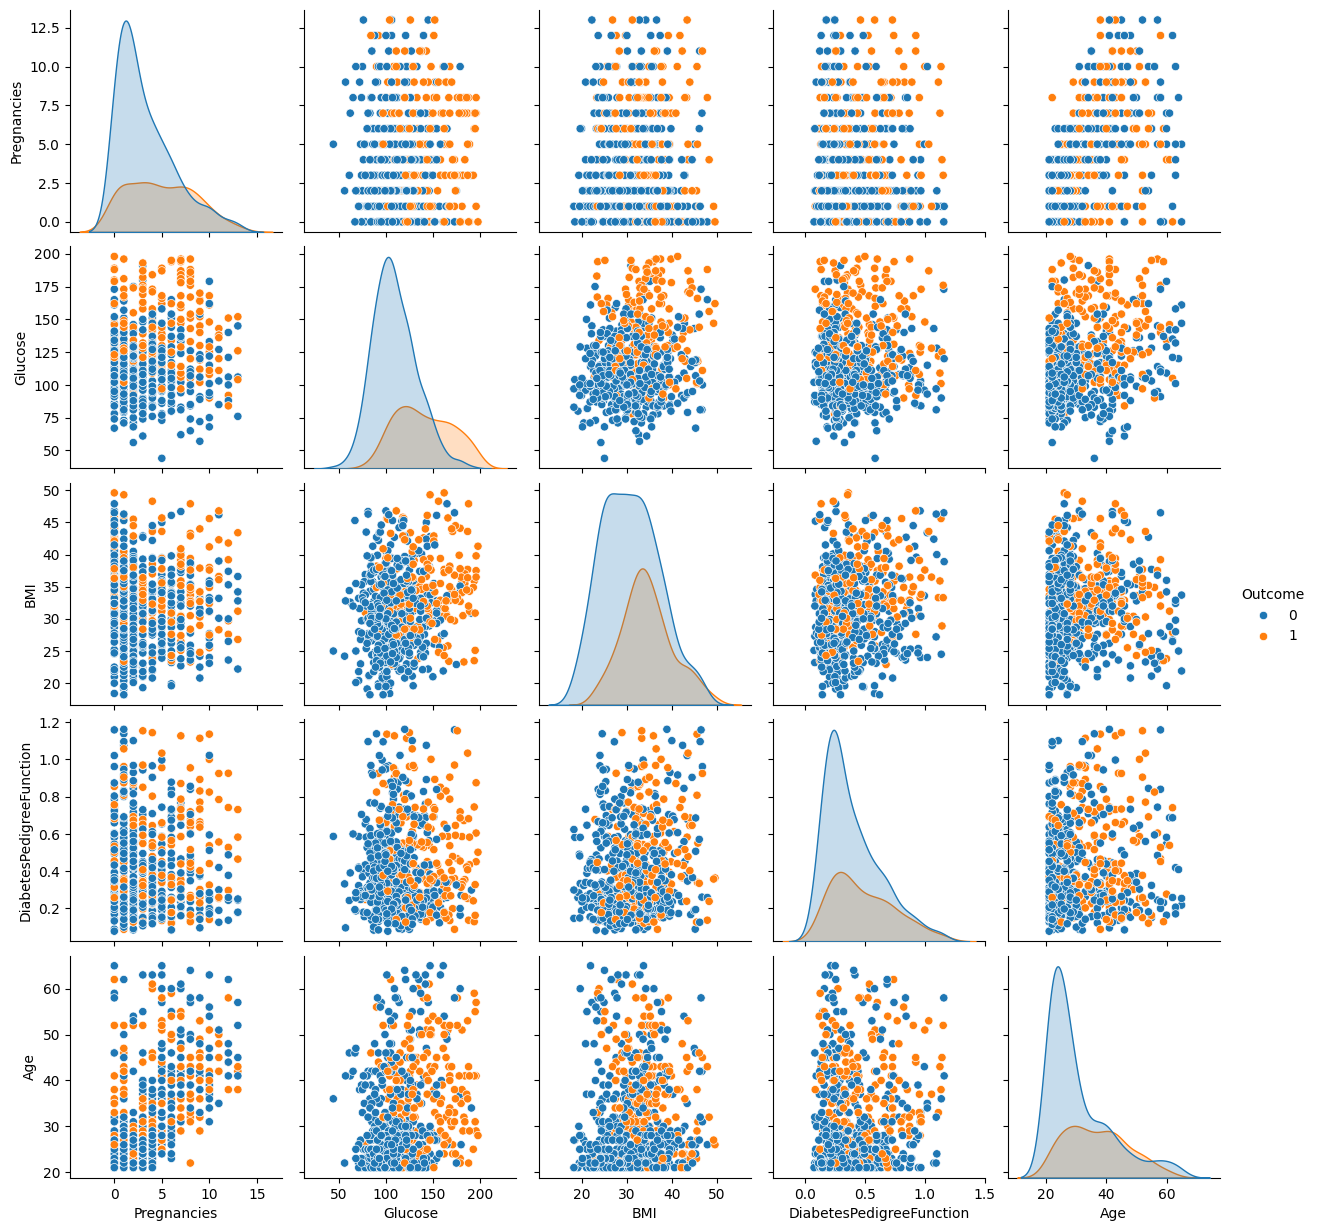

In [24]:
import seaborn as sns
features=['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
sns.pairplot(data[features+targets], hue=targets[0])
plt.show()

<Axes: >

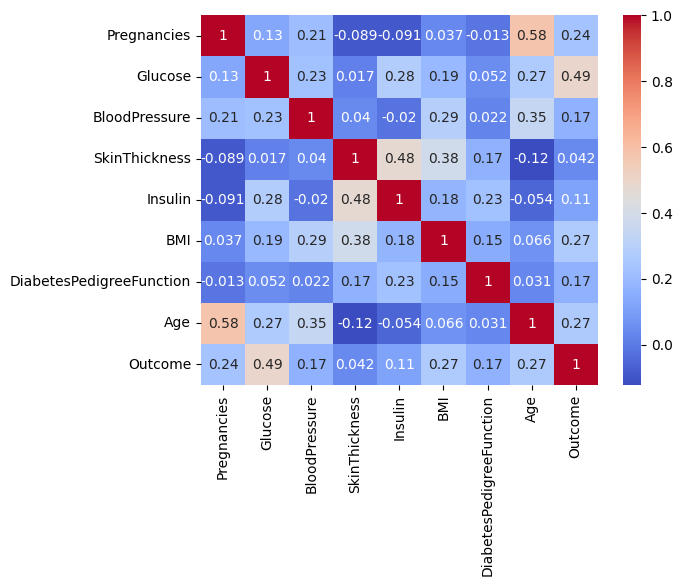

In [25]:
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
sns.heatmap(data[features+targets].corr(),annot=True, cmap='coolwarm')

In [26]:
from sklearn import svm
from sklearn.model_selection import train_test_split
features=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x_train, x_test, y_train, y_test = train_test_split(data[features], data[targets[0]], test_size=0.2, random_state=42)
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [27]:
y_pred = clf.predict(x_test)
tt=0
tf=0
ff=0
ft=0
n=len(y_test)
y_test = np.array(y_test)
for i in range(n):
    tt += y_test[i] and y_pred[i]
    tf += y_test[i] and not(y_pred[i])
    ff += not(y_test[i]) and not(y_pred[i])
    ft += not(y_test[i]) and y_pred[i]
print(f'true positive-{tt}, true negative-{tf}, false positive-{ft}, false negative-{ff}')

true positive-13, true negative-23, false positive-10, false negative-82


In [34]:
accuracy = (tt+ff)/n
print("Accuracy:", accuracy)

Accuracy: 0.7421875


In [29]:
n=len(y_test)
col = np.array([0.5]*n)
for i in range(n):
    col[i] = y_test[i] + y_pred[i]/2

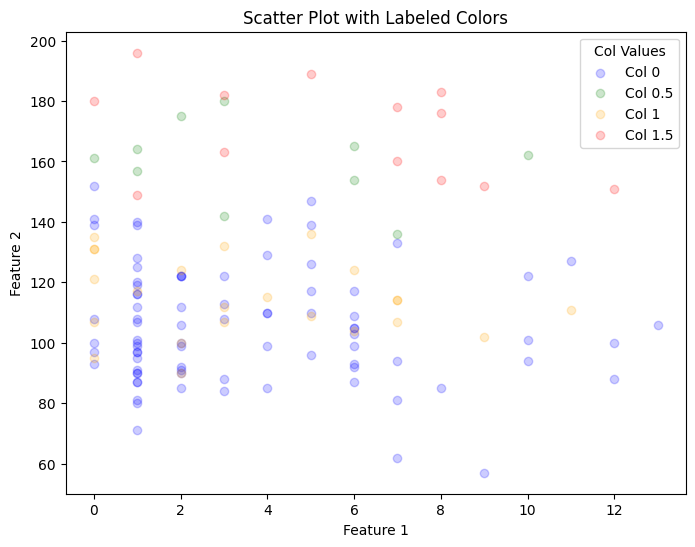

In [42]:
color_map = {0: 'blue', 0.5: 'green', 1: 'orange', 1.5: 'red'}
lab = {0: 'False Negative', 0.5: 'False Positive', 1: 'True Negative', 1.5: 'True Positive'}

# Create scatter plot with labeled colors
plt.figure(figsize=(8, 6))
for value, color in color_map.items():
    mask = col == value
    plt.scatter(
        x_test.iloc[mask, 0], 
        x_test.iloc[mask, 1],  
        c=color,
        label=f"Col {value}",
        alpha=0.2
    )


plt.legend(title="Col Values")
plt.xlabel("Pregnancies")
plt.ylabel("Glucose'")
plt.title("Scatter Plot with Labeled Colors")
plt.show()

In [31]:
x_test.iloc[:,0]

338     9
763    10
104     2
437     5
184     4
       ..
723     5
246    10
346     1
275     2
358    12
Name: Pregnancies, Length: 128, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[82 10]
 [23 13]]


In [36]:
print("Support Vectors:\n", clf.support_vectors_)
print("Number of Support Vectors per Class:\n", clf.n_support_)
print("Dual Coefficients:\n", clf.dual_coef_)
print("Intercept:\n", clf.intercept_)

Support Vectors:
 [[1.00e+01 1.29e+02 7.60e+01 ... 3.59e+01 2.80e-01 3.90e+01]
 [5.00e+00 1.06e+02 8.20e+01 ... 3.95e+01 2.86e-01 3.80e+01]
 [0.00e+00 1.35e+02 9.40e+01 ... 4.06e+01 2.84e-01 2.60e+01]
 ...
 [4.00e+00 1.48e+02 6.00e+01 ... 3.09e+01 1.50e-01 2.90e+01]
 [3.00e+00 1.71e+02 7.20e+01 ... 3.33e+01 1.99e-01 2.40e+01]
 [0.00e+00 1.05e+02 8.40e+01 ... 2.79e+01 7.41e-01 6.20e+01]]
Number of Support Vectors per Class:
 [139 138]
Dual Coefficients:
 [[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -0.5054368
  -1.         -1.         -1.         -0.35710067 -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -0.32

# using neural network

In [11]:
!pip3 install torch torchvision torchaudio

   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.8/204.2 MB 4.2 MB/s eta 0:00:49
   ---------------------------------------- 1.6/204.2 MB 4.0 MB/s eta 0:00:51
    --------------------------------------- 2.6/204.2 MB 4.3 MB/s eta 0:00:47
    --------------------------------------- 3.7/204.2 MB 4.5 MB/s eta 0:00:46
    --------------------------------------- 4.5/204.2 MB 4.3 MB/s eta 0:00:47
   - -------------------------------------- 5.5/204.2 MB 4.4 MB/s eta 0:00:45
   - -------------------------------------- 6.3/204.2 MB 4.3 MB/s eta 0:00:47
   - -------------------------------------- 7.3/204.2 MB 4.4 MB/s eta 0:00:45
   - -------------------------------------- 8.4/204.2 MB 4.5 MB/s eta 0:00:44
   - -------------------------------------- 9.4/204.2 MB 4.6 MB/s eta 0:00:43
   -- ------------------------------------- 10.7/204.2 MB 4.7 MB/s eta 0:00:42
   -- ------------------------------------- 11.8/204.2 MB 4.8 MB/s eta

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [81]:
data = pd.read_csv("diabetes.csv")

In [82]:
print(data.columns)
features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'Age']
targets = ['Outcome']


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [83]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for feature in features:
    data[feature] = data[feature].replace(0, data[feature].median())

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

data['Glucose_BMI'] = data['Glucose'] * data['BMI']
data['Age_Insulin'] = data['Age'] * data['Insulin']

data['Insulin'] = np.log1p(data['Insulin'])

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(data[features])



In [85]:
for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]


In [86]:
# Check the distribution of the target
print(data['Outcome'].value_counts())


Outcome
0    473
1    246
Name: count, dtype: int64


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    data[features].values, data[targets].values, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [88]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # First hidden layer with 32 neurons
        self.hidden1 = nn.Linear(len(features), 32)
        self.activation1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)  # Dropout with 30% chance of dropping neurons

        # Second hidden layer with 16 neurons
        self.hidden2 = nn.Linear(32, 16)
        self.activation2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)  # Dropout with 30% chance of dropping neurons

        # Output layer (1 neuron for binary classification)
        self.output = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary output

    def forward(self, x):
        x = self.activation1(self.hidden1(x))  # Hidden layer 1 with ReLU
        x = self.dropout1(x)  # Apply dropout after hidden layer 1
        x = self.activation2(self.hidden2(x))  # Hidden layer 2 with ReLU
        x = self.dropout2(x)  # Apply dropout after hidden layer 2
        x = self.sigmoid(self.output(x))  # Output layer with Sigmoid
        return x

In [89]:
model = NeuralNet()

# Define loss function & optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Learning rate scheduler (optional for further tuning)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)




In [ ]:
# Define the model, loss function, and optimizer
model = NeuralNet()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Adam optimizer with learning rate
outputs = outputs.squeeze()

y_train = y_train.squeeze()  
# Training loop
num_epochs = 30000
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs.squeeze(), y_train)  # Calculate loss (squeeze to match target shape)
    
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backward pass
    optimizer.step()  # Optimizer step
    
    # Calculate accuracy
    predicted = (outputs.squeeze() > 0.3).float()  # Convert probabilities to binary predictions (0 or 1)
    accuracy = (predicted == y_train).float().mean()  # Calculate accuracy

    if (epoch+1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}", end='----------------')
        model.eval()
        with torch.no_grad():
            predictions = model(X_test)
            predictions = (predictions > 0.8).float()  # Convert to binary (0 or 1)
            accuracy = (predictions == y_test).float().mean()
        
        print(f"Model Accuracy: {accuracy.item() * 100:.2f}%")


Epoch [1000/30000], Loss: 0.5022----------------Model Accuracy: 73.61%
Epoch [2000/30000], Loss: 0.4884----------------Model Accuracy: 73.61%


In [71]:
# ---- Evaluate Model ----
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    predictions = (predictions > 0.5).float()  # Convert to binary (0 or 1)
    accuracy = (predictions == y_test).float().mean()

print(f"Model Accuracy: {accuracy.item() * 100:.2f}%")

Model Accuracy: 33.12%


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
